In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import tensorflow as tf


# Import data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
# Train
accuracy_history = []
loss_history = []
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

    # Test trained model
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    [accuracy_i , loss_i] = sess.run([accuracy, cross_entropy], feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    accuracy_history.append(accuracy_i)
    loss_history.append(loss_i)
    print ('Iteration #', _)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Iteration # 0
Iteration # 1
Iteration # 2
Iteration # 3
Iteration # 4
Iteration # 5
Iteration # 6
Iteration # 7
Iteration # 8
Iteration # 9
Iteration # 10
Iteration # 11
Iteration # 12
Iteration # 13
Iteration # 14
Iteration # 15
Iteration # 16
Iteration # 17
Iteration # 18
Iteration # 19
Iteration # 20
Iteration # 21
Iteration # 22
Iteration # 23
Iteration # 24
Iteration # 25
Iteration # 26
Iteration # 27
Iteration # 28
Iteration # 29
Iteration # 30
Iteration # 31
Iteration # 32
Iteration # 33
Iteration # 34
Iteration # 35
Iteration # 36
Iteration # 37
Iteration # 38
Iteration # 39
Iteration # 40
Iteration # 41
Iteration # 42
Iteration # 43
Iteration # 44
Iteration # 45
Iteration # 46
Iteration # 47
Iteration # 48
Iteration # 49
Iteration # 50
Iteration # 51
Iteration # 52
Iteration # 53
Iterat

Iteration # 508
Iteration # 509
Iteration # 510
Iteration # 511
Iteration # 512
Iteration # 513
Iteration # 514
Iteration # 515
Iteration # 516
Iteration # 517
Iteration # 518
Iteration # 519
Iteration # 520
Iteration # 521
Iteration # 522
Iteration # 523
Iteration # 524
Iteration # 525
Iteration # 526
Iteration # 527
Iteration # 528
Iteration # 529
Iteration # 530
Iteration # 531
Iteration # 532
Iteration # 533
Iteration # 534
Iteration # 535
Iteration # 536
Iteration # 537
Iteration # 538
Iteration # 539
Iteration # 540
Iteration # 541
Iteration # 542
Iteration # 543
Iteration # 544
Iteration # 545
Iteration # 546
Iteration # 547
Iteration # 548
Iteration # 549
Iteration # 550
Iteration # 551
Iteration # 552
Iteration # 553
Iteration # 554
Iteration # 555
Iteration # 556
Iteration # 557
Iteration # 558
Iteration # 559
Iteration # 560
Iteration # 561
Iteration # 562
Iteration # 563
Iteration # 564
Iteration # 565
Iteration # 566
Iteration # 567
Iteration # 568
Iteration # 569
Iteratio

In [8]:
accuracy_history = np.array(accuracy_history)

In [9]:
loss_history = np.array(loss_history)

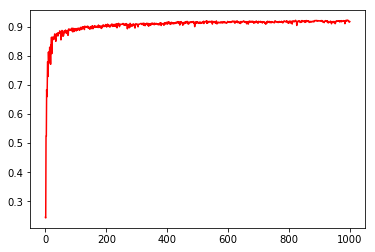

In [10]:
plt.plot(accuracy_history, 'r')

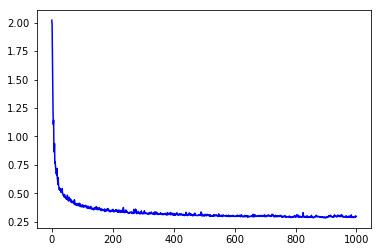

In [11]:
plt.plot(loss_history, 'b')